# **Project - Deep Learning**
---

> *Backgroud Problem:*

Permasalahan utama dalam pemberian kredit perbankan adalah tingginya rasio kredit bermasalah (NPL) yang mencapai 12%, melebihi batas maksimum 5% yang ditetapkan OJK. Hal ini disebabkan oleh keterbatasan sistem evaluasi kredit konvensional yang masih manual, sehingga tidak mampu mengidentifikasi pola kompleks dalam data calon debitur. Akibatnya, keputusan kredit menjadi kurang akurat dan meningkatkan risiko gagal bayar. Untuk mengatasi hal tersebut, dibutuhkan pendekatan berbasis machine learning yang lebih adaptif dan akurat dalam memprediksi risiko kredit.




## Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Dataset

In [ ]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [ ]:
ListofDecs = []

for i in df.columns:
  ListofDecs.append([i, df[i].dtype, df.shape[0], df[i].isna().sum(), round((df[i].isna().sum()/df.shape[0])*100, 2), df[i].nunique(), df[i].unique()[:5]])

df_decs = pd.DataFrame(ListofDecs, columns=['column', 'type', 'total row', 'null', 'percentage null', 'number of unique value', 'sample unique value'])
df_decs

,column,type,total row,null,percentage null,number of unique value,sample unique value
0,id,int64,466285,0,0.00,466285,"[1077501, 1077430, 1077175, 1076863, 1075358]"
1,member_id,int64,466285,0,0.00,466285,"[1296599, 1314167, 1313524, 1277178, 1311748]"
2,loan_amnt,int64,466285,0,0.00,1352,"[5000, 2500, 2400, 10000, 3000]"
3,funded_amnt,int64,466285,0,0.00,1354,"[5000, 2500, 2400, 10000, 3000]"
4,funded_amnt_inv,float64,466285,0,0.00,9854,"[4975.0, 2500.0, 2400.0, 10000.0, 3000.0]"
5,term,object,466285,0,0.00,2,"[ 36 months, 60 months]"
6,int_rate,float64,466285,0,0.00,506,"[10.65, 15.27, 15.96, 13.49, 12.69]"
7,installment,float64,466285,0,0.00,55622,"[162.87, 59.83, 84.33, 339.31, 67.79]"
8,grade,object,466285,0,0.00,7,"[B, C, A, E, F]"
9,sub_grade,object,466285,0,0.00,35,"[B2, C4, C5, C1, B5]"


**Kesimpulan**  

Berdasarkan hasil deskripsi setiap kolom, dapat disimpulkan bahwa dataset ini terdiri dari **74 kolom** dan **466.285 baris data**.  

Untuk meningkatkan kualitas data dan memastikan hanya fitur yang relevan digunakan dalam analisis lebih lanjut, akan dilakukan langkah-langkah berikut:  

1. **Penghapusan Kolom dengan Nilai Null Lebih dari 60%**  
   Kolom-kolom berikut memiliki lebih dari 60% data yang bernilai null sehingga dianggap kurang informatif dan akan dihapus:  
   
   - `desc`  
   - `mths_since_last_record`  
   - `annual_inc_joint`  
   - `dti_joint`  
   - `verification_status_joint`  
   - `open_acc_6m`  
   - `open_il_6m`  
   - `open_il_12m`  
   - `open_il_24m`  
   - `mths_since_rcnt_il`  
   - `total_bal_il`  
   - `il_util`  
   - `open_rv_12m`  
   - `open_rv_24m`  
   - `max_bal_bc`  
   - `all_util`  
   - `inq_fi`  
   - `total_cu_tl`  
   - `inq_last_12m`
   - `mths_since_last_major_derog`
   - `next_pymnt_d`
   - `mths_since_last_delinq`

2. **Penghapusan Kolom yang Kurang Relevan**  
   Selain itu, beberapa kolom yang dianggap tidak memberikan kontribusi signifikan terhadap analisis juga akan dihapus, yaitu:  

   - `id`  
   - `member_id`  
   - `emp_title`  
   - `url`  
   - `desc`  
   - `policy_code`  
   - `application_type`
   - `zip_code`  
   - `inq_last_6mths`
   - `delinq_2yrs`

Langkah ini bertujuan untuk menyederhanakan dataset dan meningkatkan efisiensi dalam proses analisis data. Hanya fitur yang relevan dan berpotensi memberikan wawasan penting yang akan dipertahankan.  


In [ ]:
# mengubah loan_status
df['loan_status'] = df['loan_status'].apply(lambda x: "good" if x in ['Current', 'Fully Paid'] else 'bad')

In [ ]:
df_dist_perce = df.groupby('loan_status').agg(Count=('loan_status', 'count')).reset_index()
df_dist_perce['Percentage'] = ((df_dist_perce['Count'] / df_dist_perce['Count'].sum()) * 100).round(2)
df_dist_perce.sort_values('Percentage', ascending= False, inplace=True)
df_dist_perce

,loan_status,Count,Percentage
1,good,408965,87.71
0,bad,57320,12.29


In [ ]:
df_dist_perce = df.groupby('loan_status').agg(Count=('loan_status', 'count')).reset_index()
df_dist_perce['Percentage'] = ((df_dist_perce['Count'] / df_dist_perce['Count'].sum()) * 100).round(2)
df_dist_perce.sort_values('Percentage', ascending=False, inplace=True)
df_dist_perce

,loan_status,Count,Percentage
1,good,408965,87.71
0,bad,57320,12.29


In [ ]:
df = df.drop([
    'desc', 'mths_since_last_record', 'annual_inc_joint', 'dti_joint',
    'verification_status_joint', 'open_acc_6m', 'open_il_6m',
    'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
    'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'inq_fi', 'total_cu_tl', 'inq_last_12m', 'member_id',
    'emp_title', 'url', 'policy_code', 'application_type', 'mths_since_last_delinq',
    'zip_code', 'pymnt_plan', 'mths_since_last_major_derog', 'next_pymnt_d'
], axis=1)

In [ ]:
cat = df.select_dtypes('object').columns
num = df.select_dtypes('number').columns

print(f'Number of Numeric Columns: {len(num)}')
print(f'Number of Categoric Columns: {len(cat)}')

Number of Numeric Columns: 30
Number of Categoric Columns: 15


In [ ]:
# Cari nilai yang mengandung simbol $
for col in df.columns:
    if df[col].astype(str).str.contains(r'\$', regex=True).any():
        print(f"Kolom '{col}' memiliki nilai dengan simbol '$'")


Kolom 'title' memiliki nilai dengan simbol '$'


In [ ]:
# Bersihkan simbol $ dalam semua kolom string
df = df.replace(r'\$', '', regex=True)

### Univariate Analysis

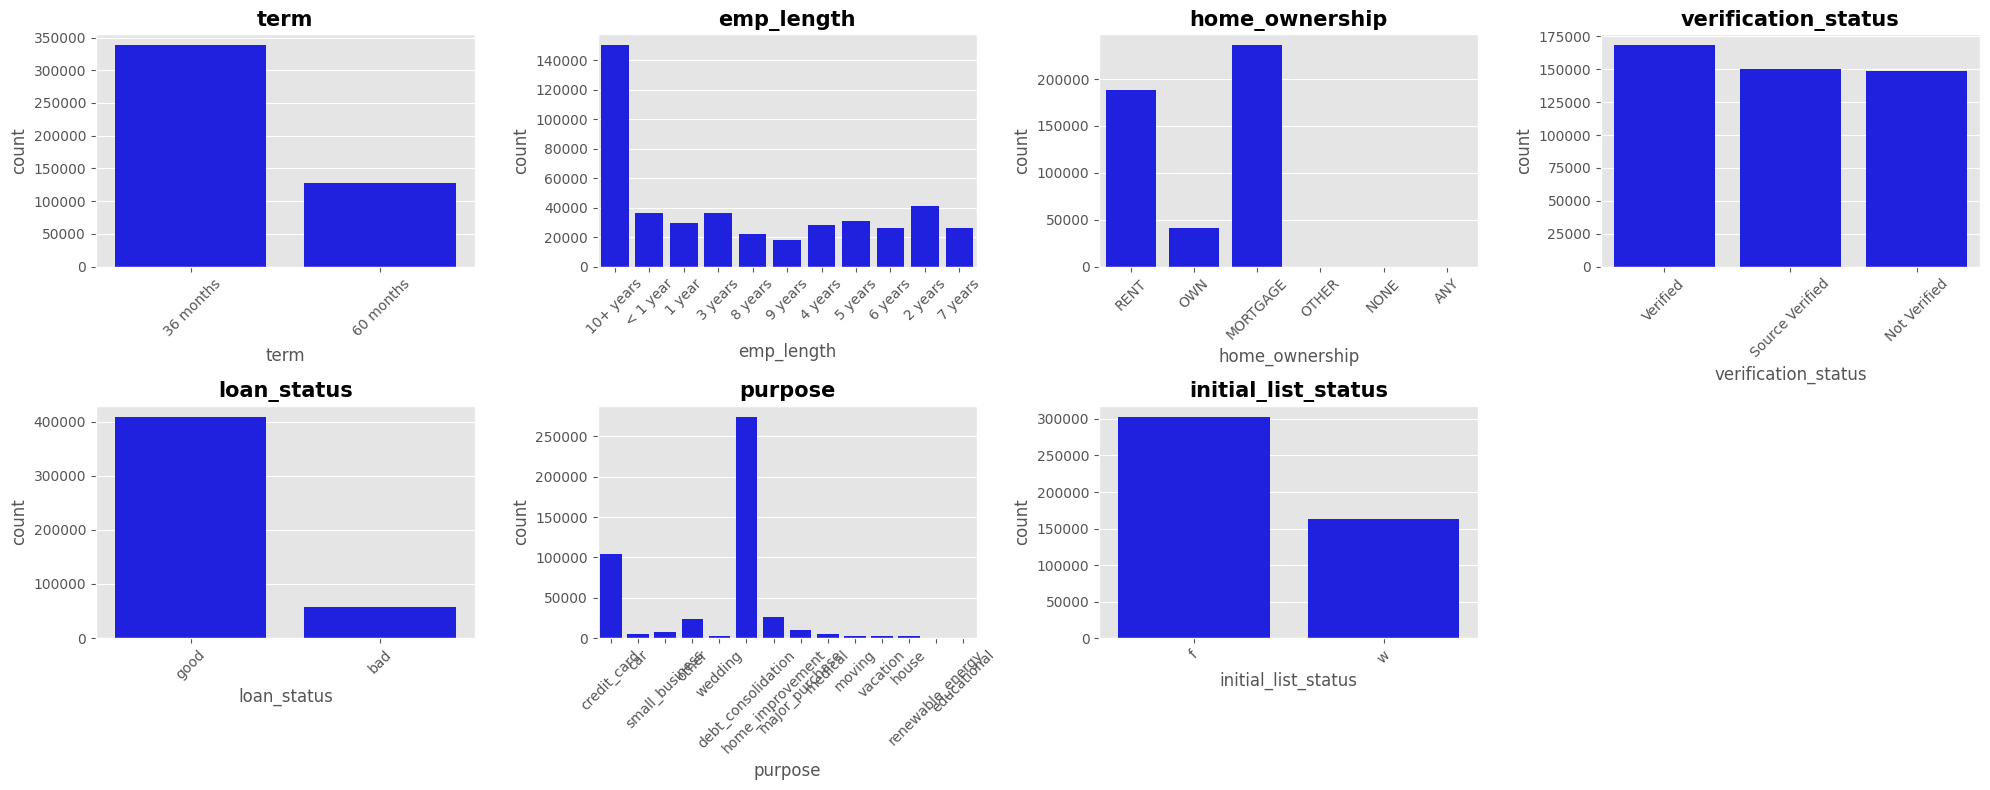

In [ ]:
cat_plot = ['term', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status']

plt.figure(figsize=(20,8))

plt.style.use('ggplot')

for i, col in enumerate(cat_plot):
  plt.subplot(2, 4, i+1)
  sns.countplot(data=df, x=col, color='blue')
  plt.title(col, fontsize=15, weight='bold', usetex=False)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Kesimpulan**

1. Trem
> Nasabah terbagi dalam dua tenor pinjaman, yakni 33 ribu untuk 36 bulan dan 13 ribu untuk 60 bulan, dengan mayoritas memilih tenor lebih pendek.
2. emp_length
> Mayoritas nasabah yang mengajukan pinjaman ialah nasabah yang sudah bekerja lebih dari 10 tahun
3. home_ownership
> Mayoritas peminjam memiliki status kepemilikan rumah MORTGAGE (hipotek) atau RENT (menyewa). Sementara itu, nasabah dengan rumah sendiri (OWN) lebih sedikit, dan kategori lain hampir tidak ada, menunjukkan banyak peminjam masih mencicil rumah atau menyewa.
4. verification_status
> Mayoritas nasabah memiliki status verifikasi Verified, diikuti oleh Source Verified dan Not Verified dengan jumlah yang hampir sama.
5. loan_status
> Mayoritas pinjaman Current dan Fully Paid, sementara sedikit yang gagal bayar atau terlambat, menunjukkan risiko kredit rendah.
6. Purpose
> Mayoritas nasabah mengajukan pinjaman untuk melunasi utang lama (debt consolidation), disusul oleh kebutuhan kartu kredit (credit card).
7. initial_list_status
> Mayoritas peminjam memiliki status Fractional (f) mencapai 30rb dan berstatus Whole (w) mencapai 16rb

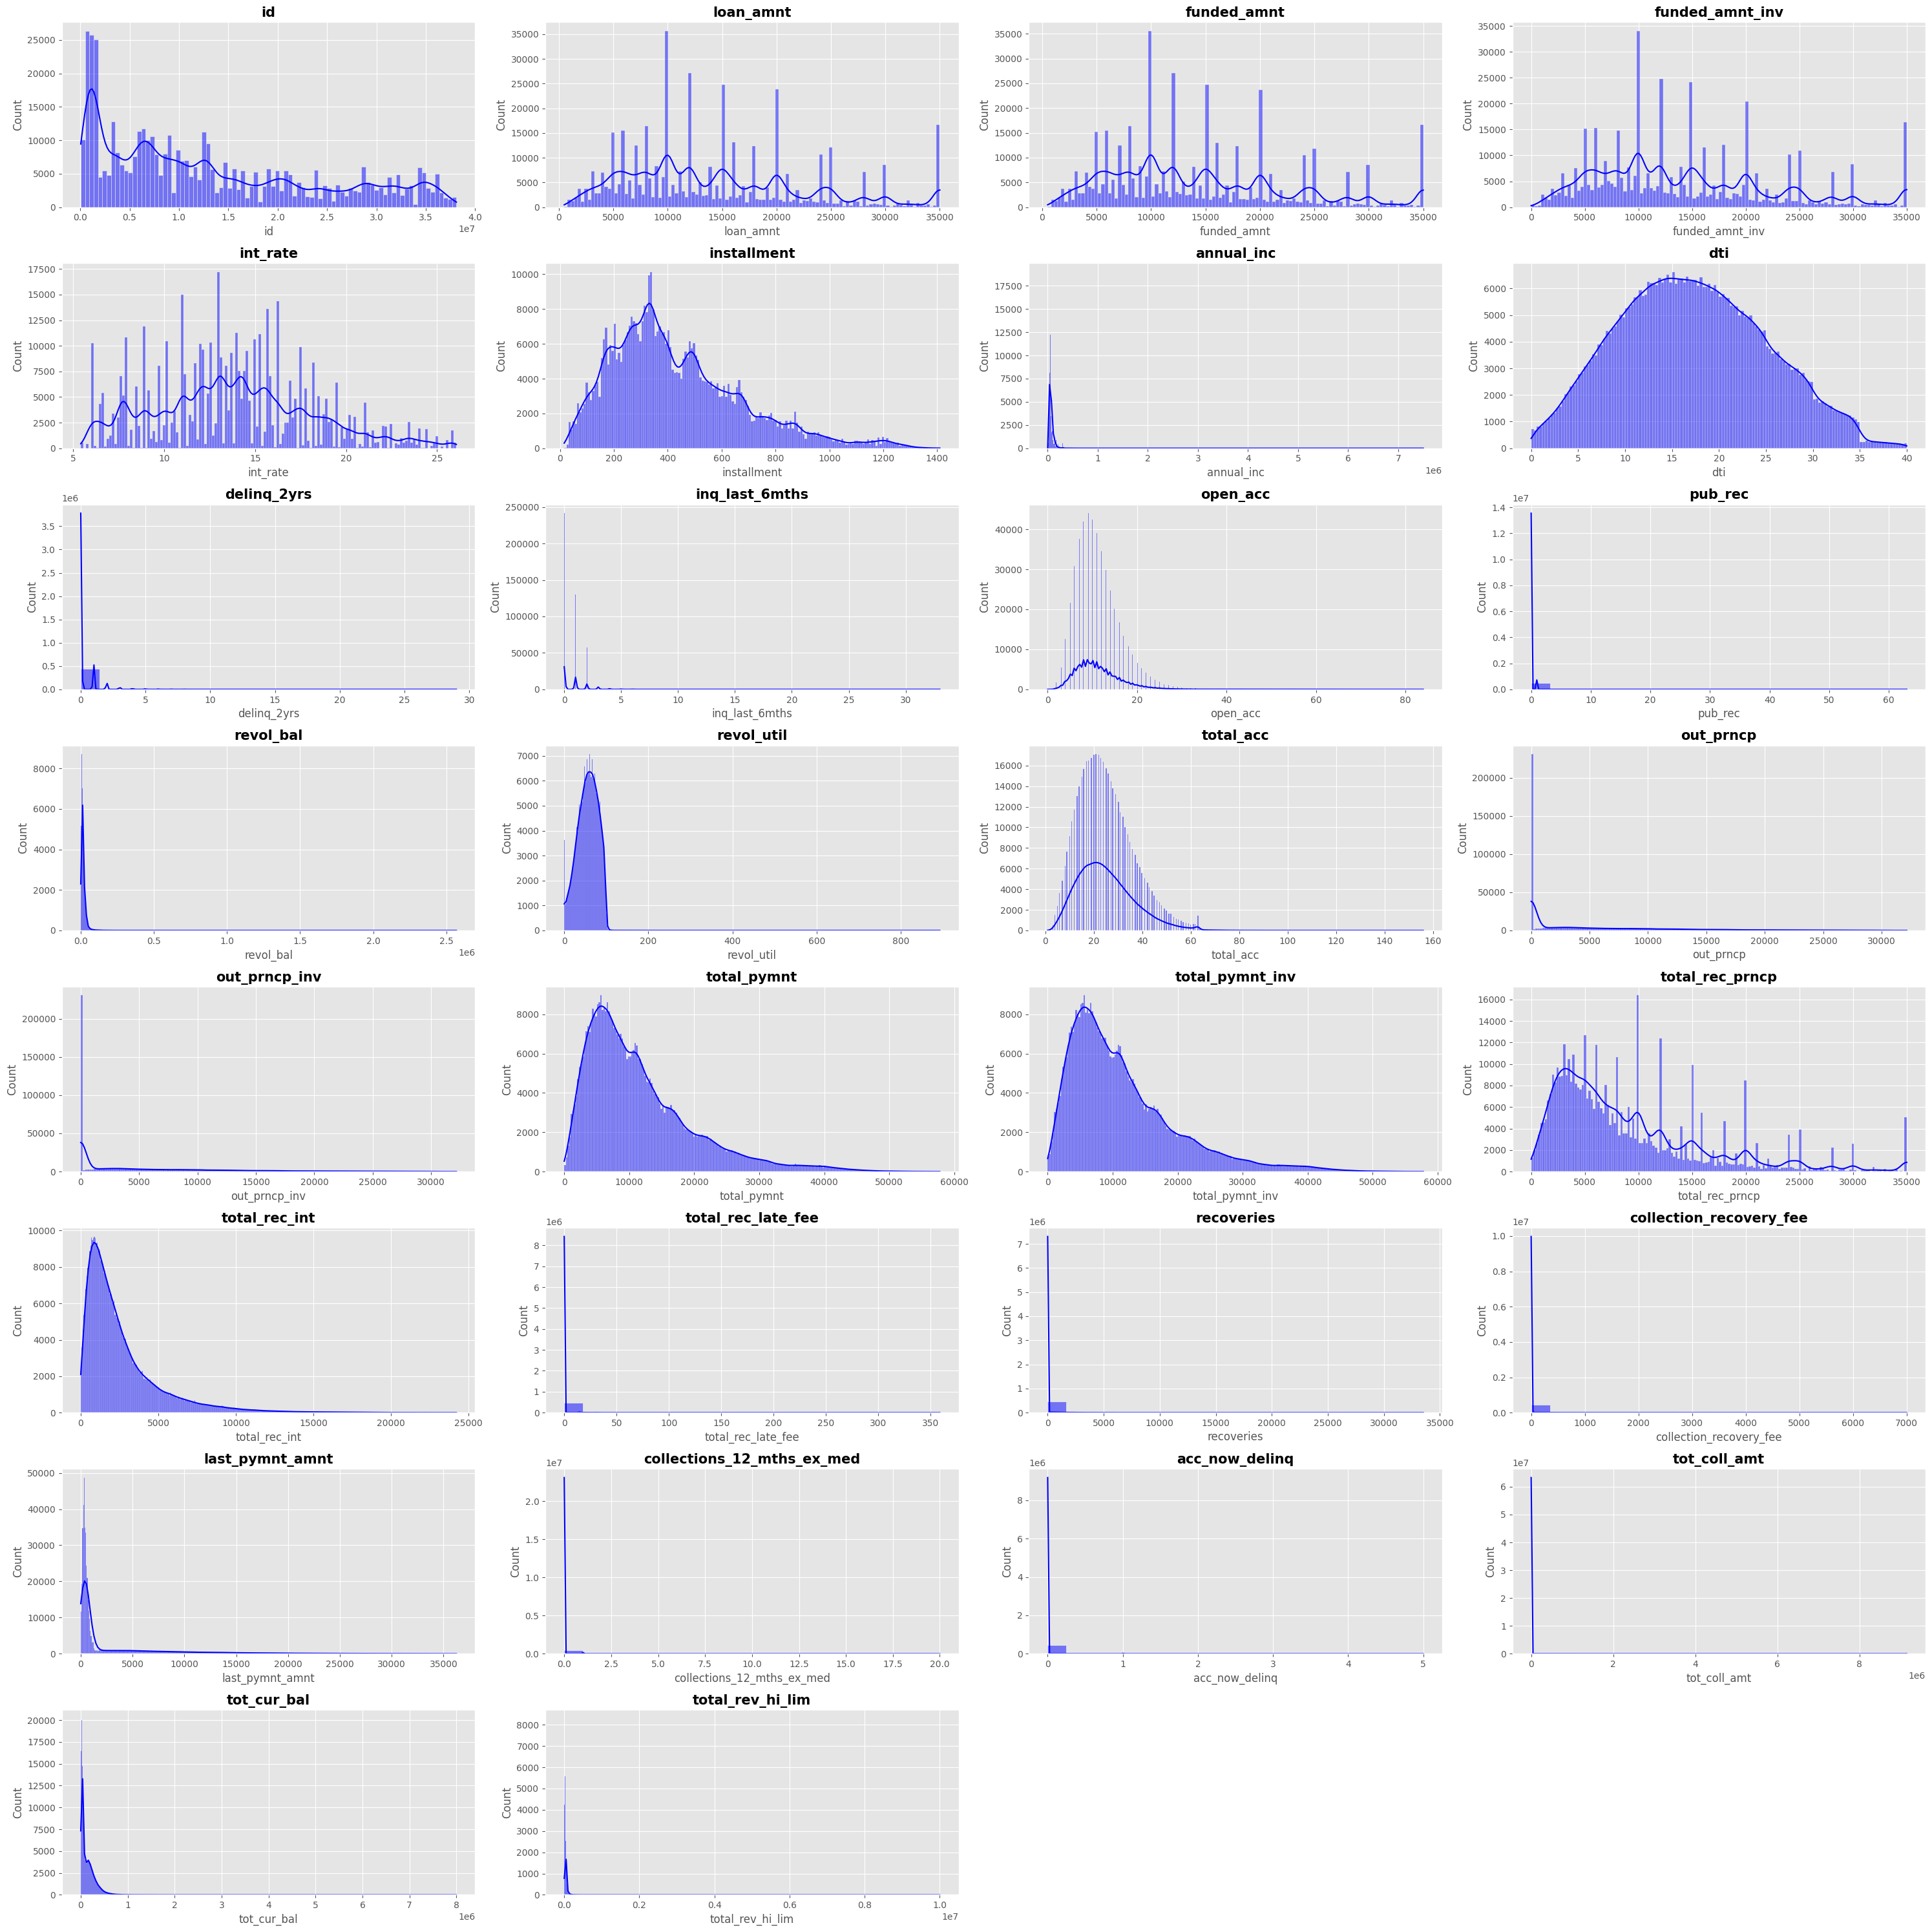

In [ ]:
plt.figure(figsize=(30,30))

plt.style.use('ggplot')

for i, col in enumerate(num):
  plt.subplot(8, 4, i+1)
  sns.histplot(data=df, x=col, color='blue', kde=True)
  plt.title(col, fontsize=15, weight='bold', usetex=False)

plt.tight_layout()
plt.show()

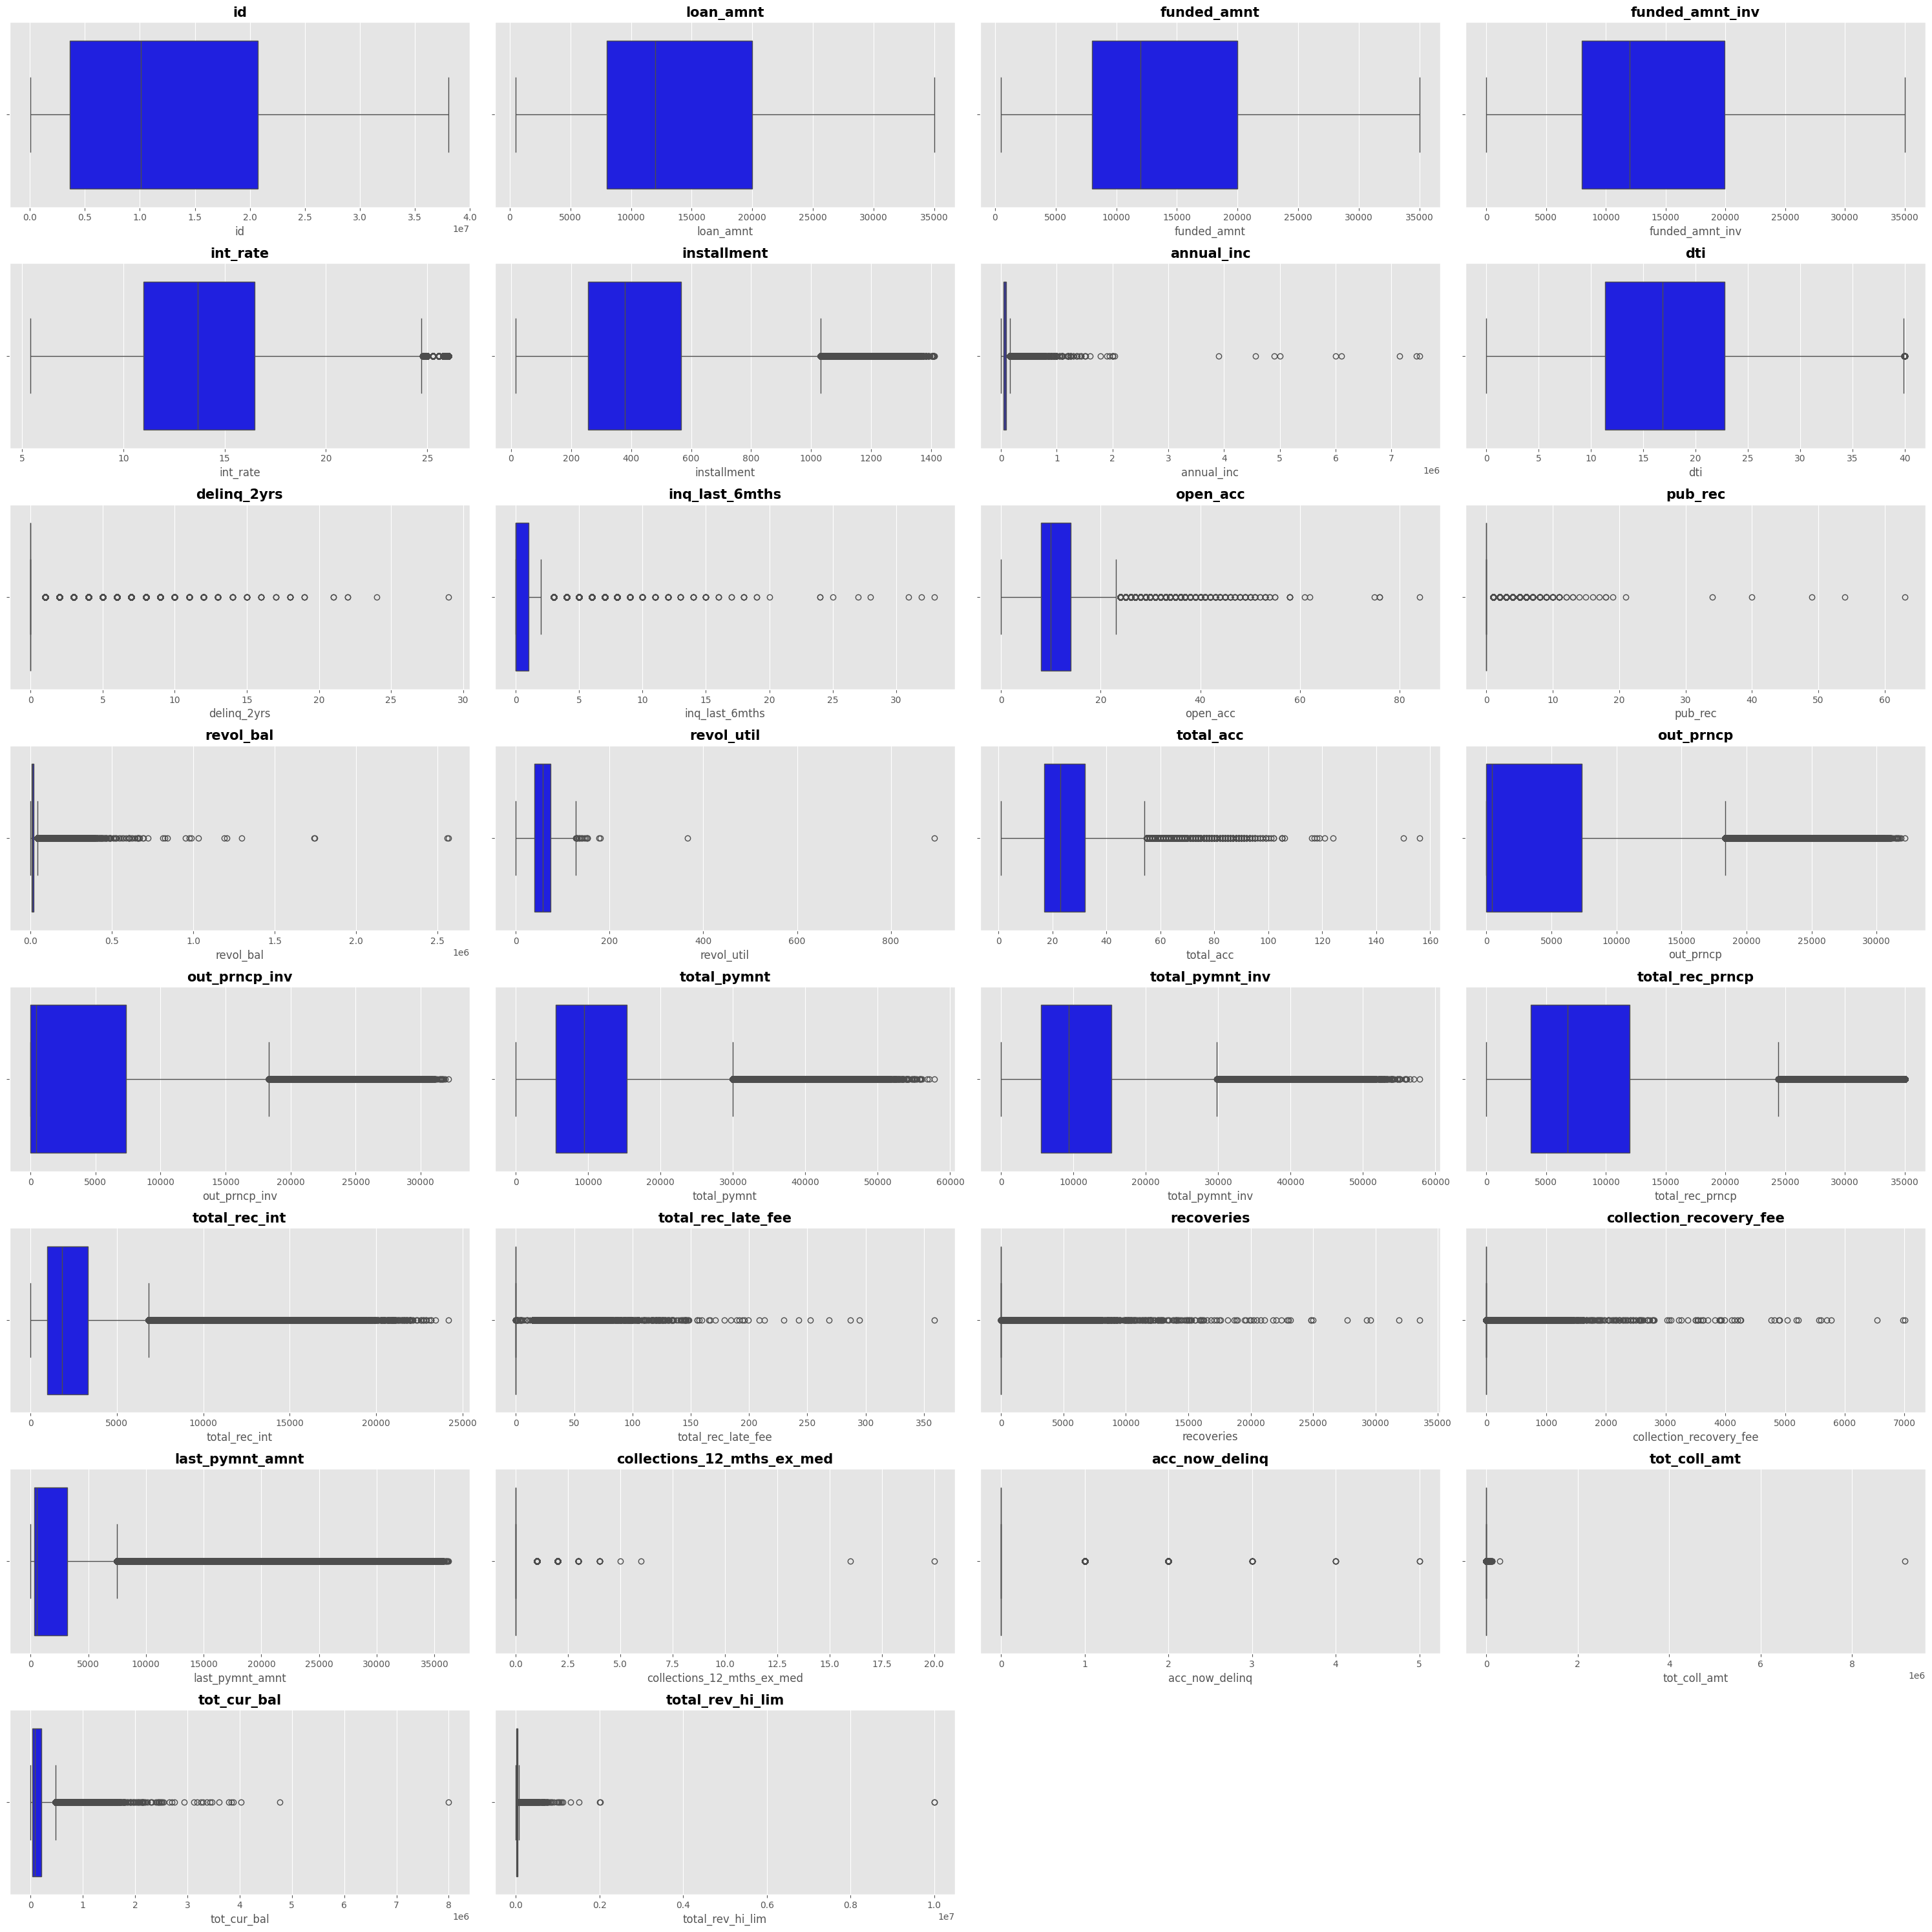

In [ ]:
plt.figure(figsize=(30,30))

plt.style.use('ggplot')

for i, col in enumerate(num):
  plt.subplot(8, 4, i+1)
  sns.boxplot(data=df, x=col, color='blue')
  plt.title(col, fontsize=15, weight='bold', usetex=False)

plt.tight_layout()
plt.show()

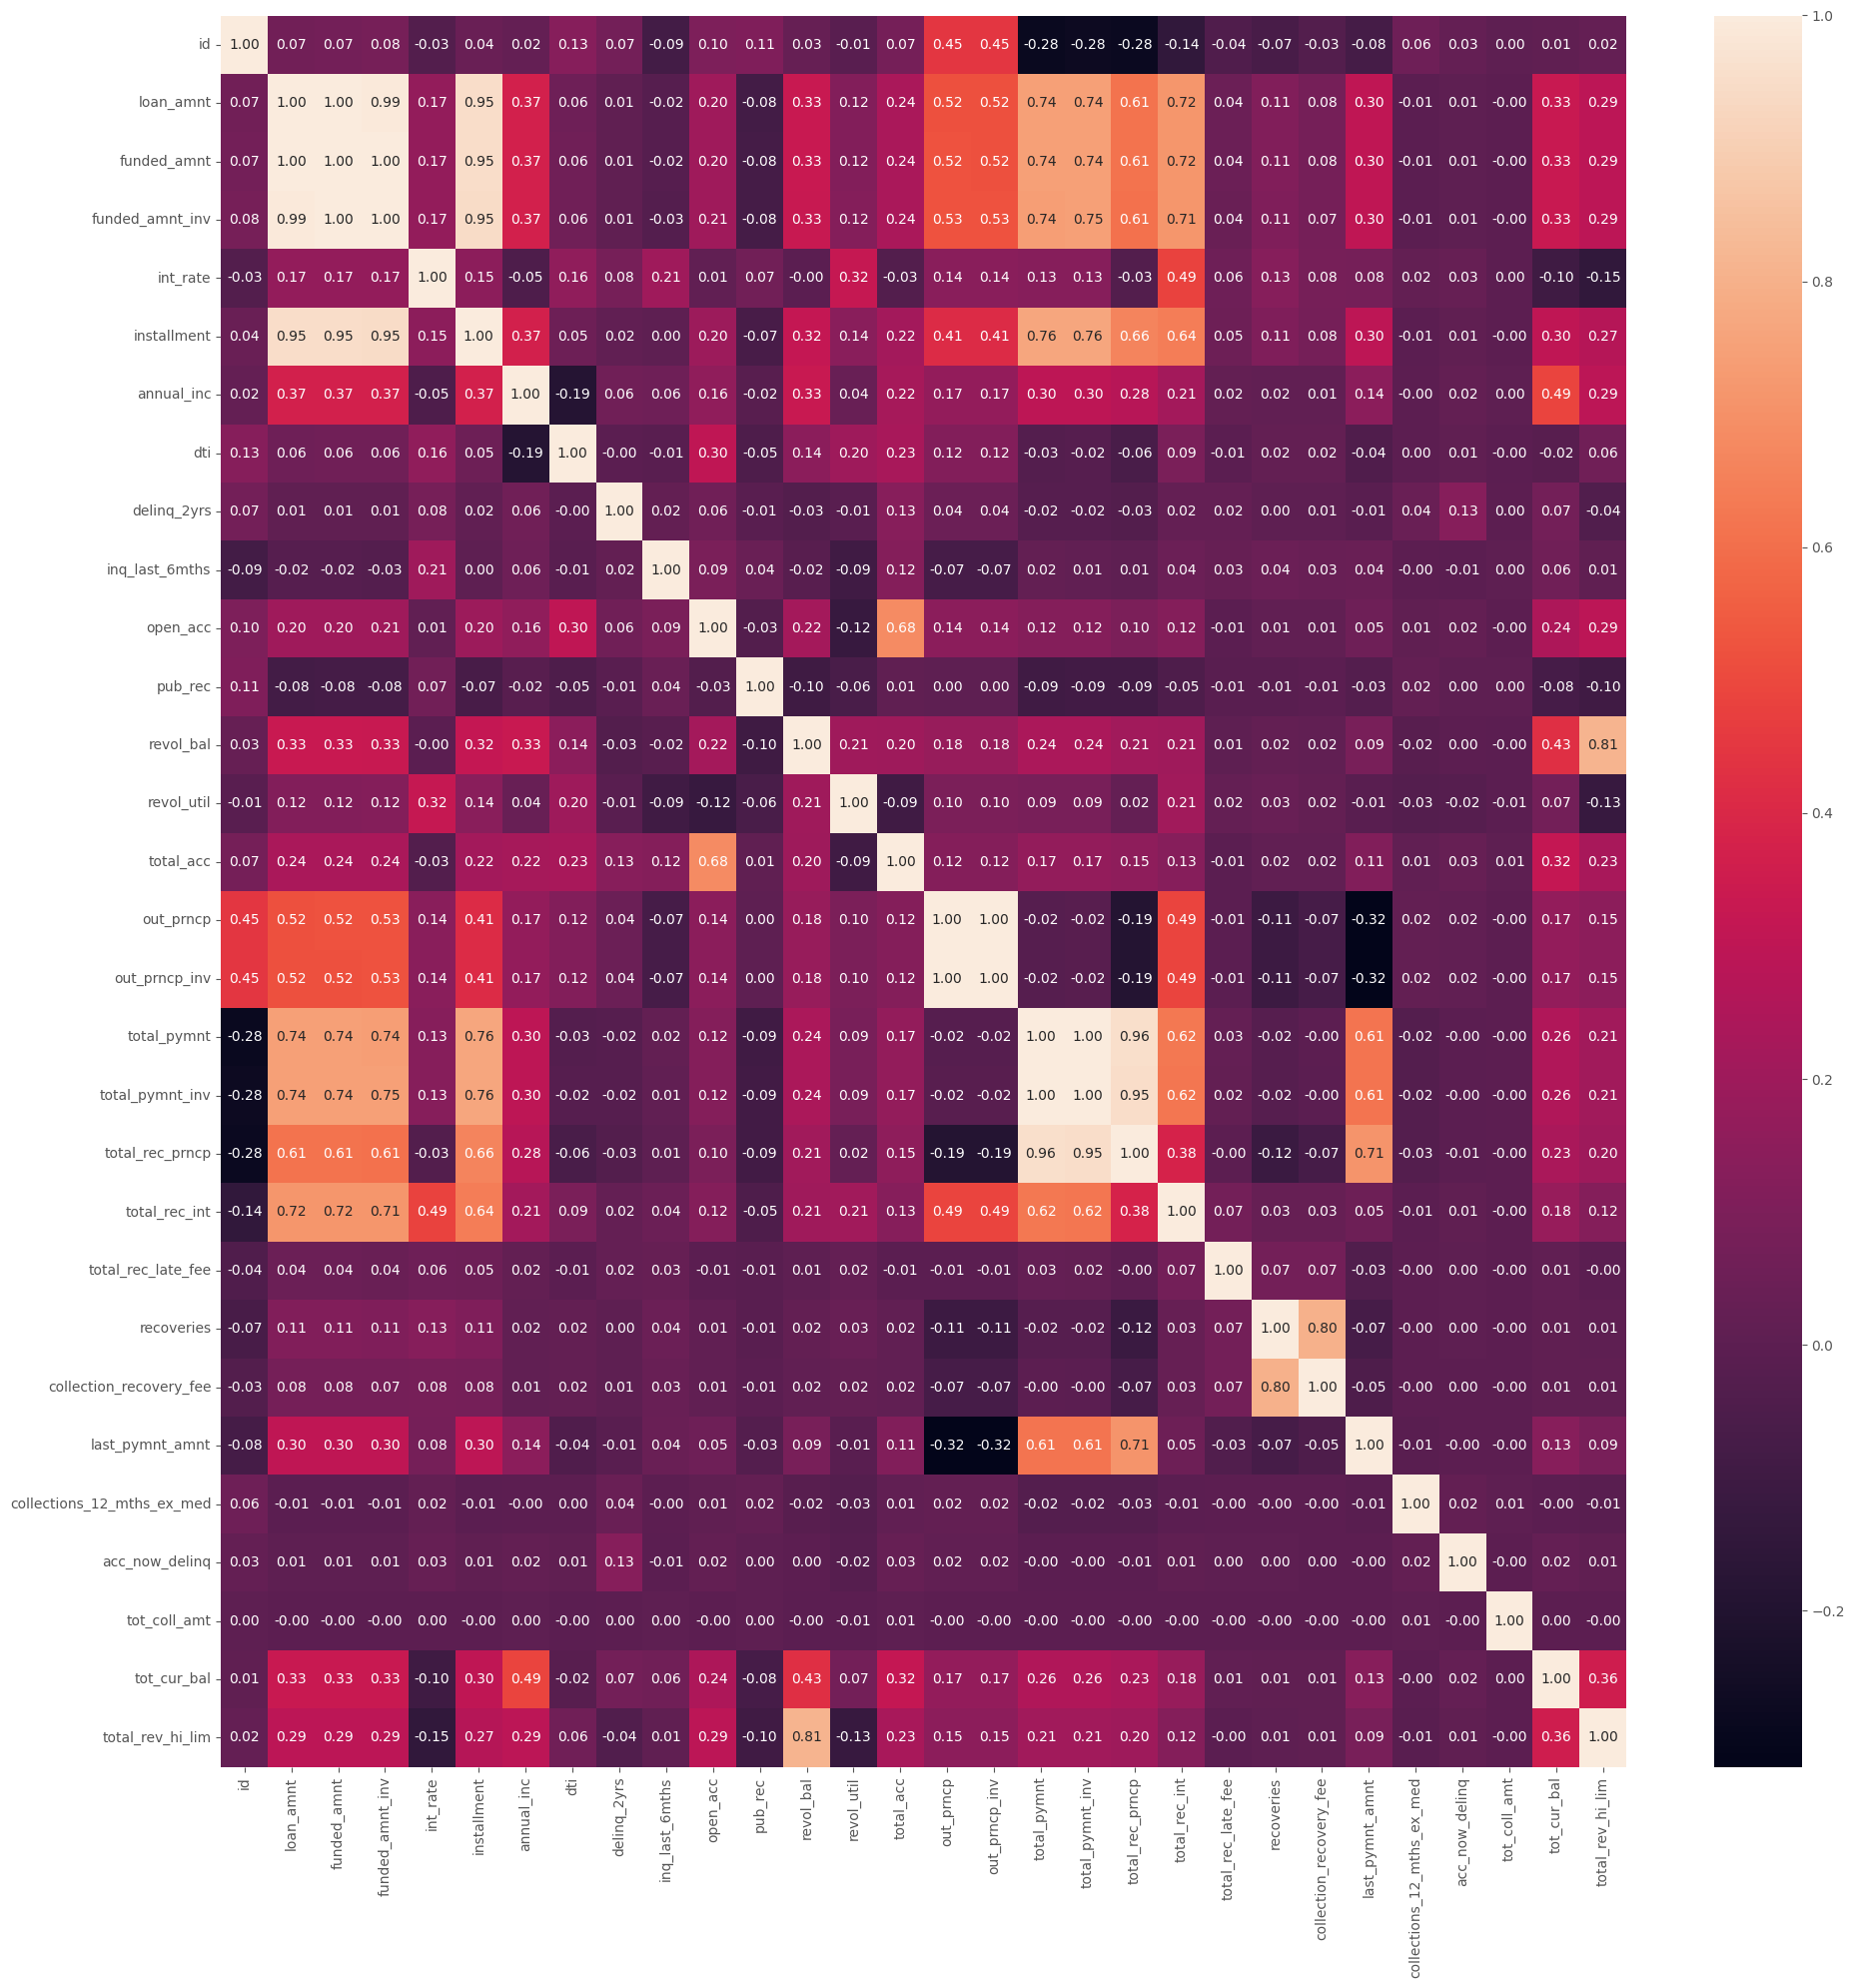

In [ ]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df[num].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()

**Kesimpulan**

Terdapat beberapa kolom feature yang redundant diantaranya:
1. ``loan_amnt`` dengan ``funded_amnt``
2. ``funded_amnt_ivn`` dengan ``installment``
3. ``total_pymnt`` dengan ``total_pymnt_ivn``
4. ``last_pymnt_amnt`` dengan ``total_rec_int``
5. dan masih banyak lagi.

Akan dilakukan penghapusan terhadap salah satu dari kedua kolom tersebut agar menghindari **Multikolinearitas**

### Multivariate Analysis

In [ ]:
def distriburion_percentage_by_category(col):
  df_dist_perce = df.groupby([col, 'loan_status']).agg(Count=('loan_status', 'count')).reset_index()
  df_dist_perce['Percentage'] = ((df_dist_perce['Count'] / df_dist_perce.groupby(col)['Count'].transform('sum')) * 100).round(2)
  df_dist_perce.sort_values('Percentage', ascending= False, inplace=True)
  return df_dist_perce

def plot_distribution_percentage_category(col, orient):
  # menyiapkan data
  data = distriburion_percentage_by_category(col)

  if orient == 'h':
    plt.figure(figsize=(12,8))
    ax = sns.barplot(y=col, x='Percentage', hue='loan_status', data=data, orient=orient, palette="Blues_d")
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.2f}%',
                    xy=(width / 2, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    plt.xlabel('Percentage by Total Clients', fontsize=12)
    plt.ylabel(f'Loan {col}', fontsize=12)

  else:
    plt.figure(figsize=(12,8))
    ax =sns.barplot(data=data, x=col, y='Percentage', hue='loan_status', palette='Blues_d')
    for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.2f}%',
                  xy=(p.get_x() + p.get_width() / 2, height/2),
                  ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

    plt.ylabel('Percentage by Total Clients', fontsize=12)
    plt.xlabel(f'Loan {col}', fontsize=12)

  plt.title(f"Percentage of Overall {col} distribution", fontsize=14, fontweight='bold')
  plt.legend(title='Loan Status', fontsize=10, title_fontsize=12)
  plt.tight_layout()
  plt.show()

##### **Term**

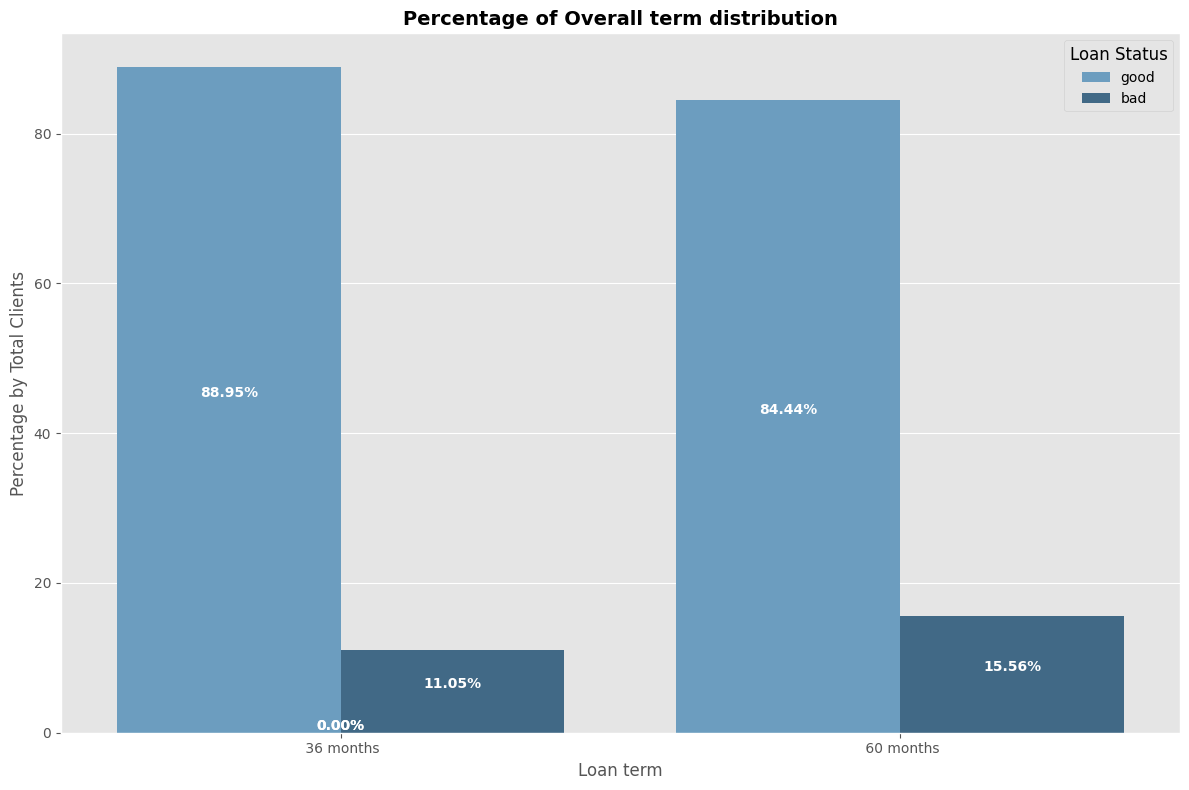

In [ ]:
plot_distribution_percentage_category('term', 'v')

#### **Purpose**

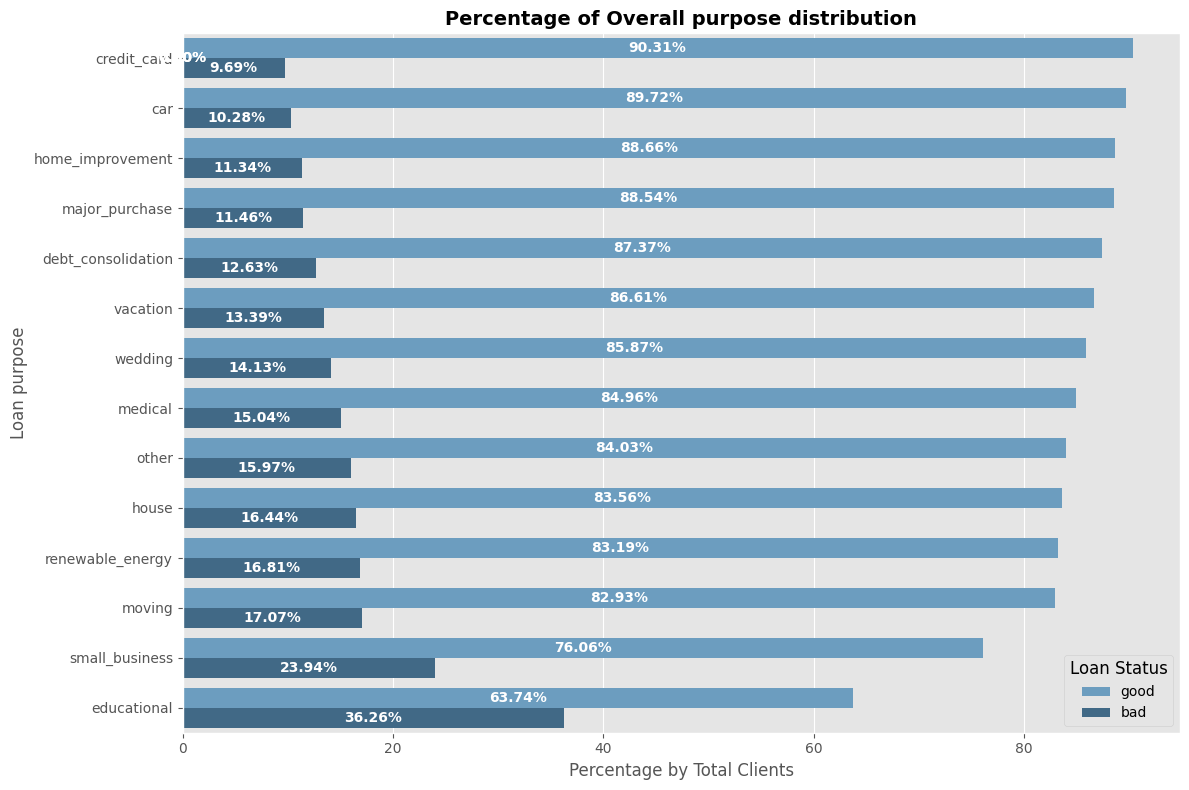

In [ ]:
plot_distribution_percentage_category('purpose', 'h')

#### **Grade**

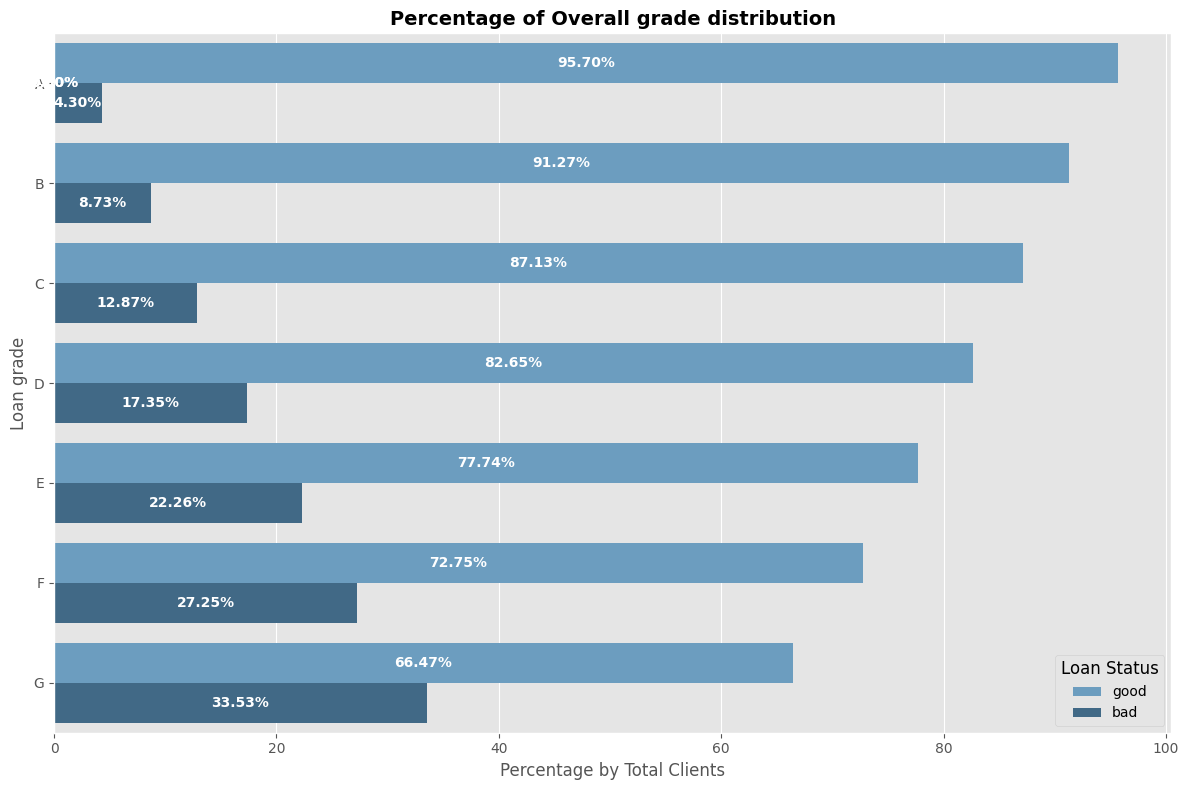

In [ ]:
plot_distribution_percentage_category('grade', 'h')

#### **Verification Status**

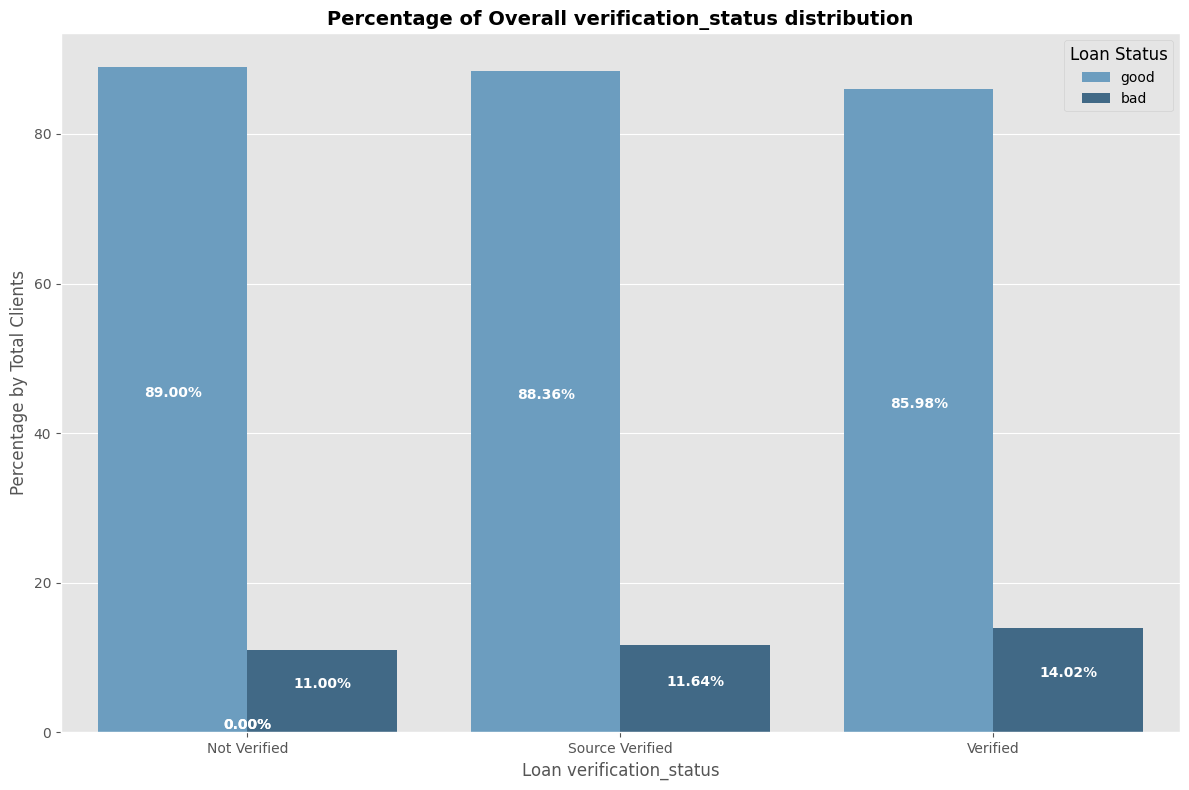

In [ ]:
plot_distribution_percentage_category('verification_status', 'v')

#### **emp_length**

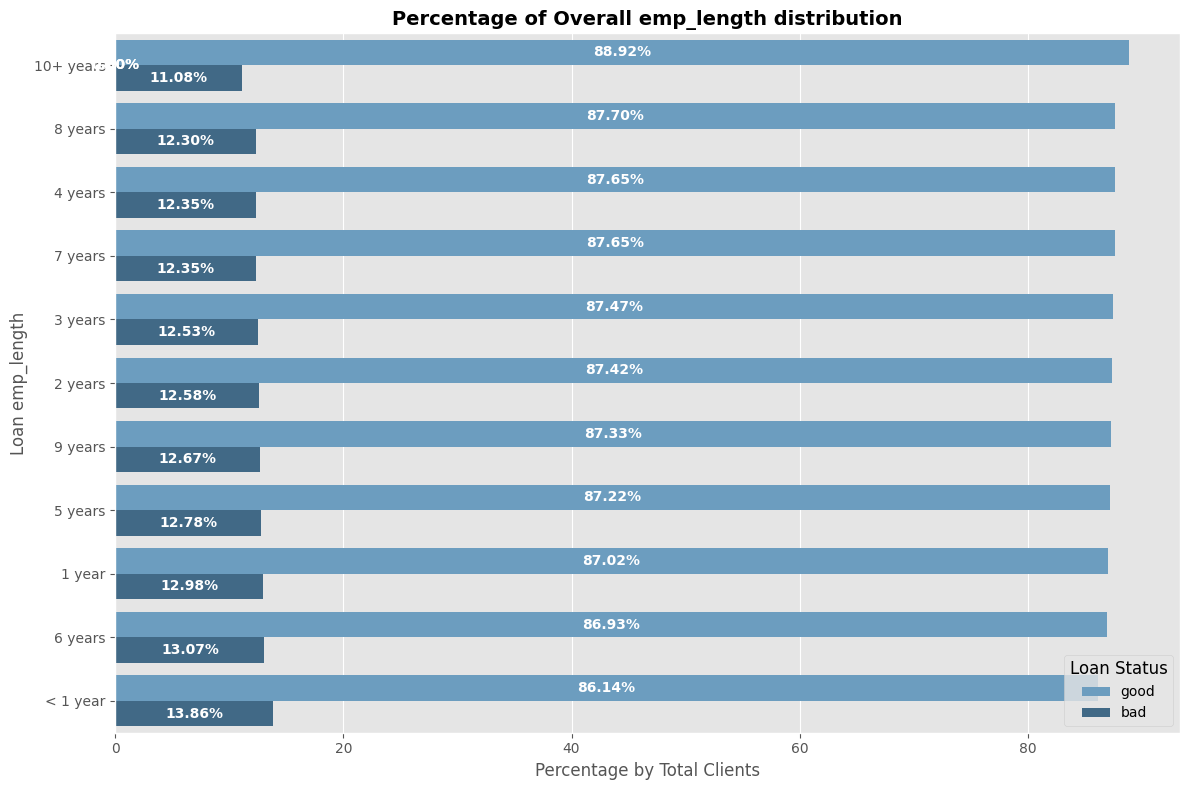

In [ ]:
plot_distribution_percentage_category('emp_length', 'h')

#### **Initial List Status**

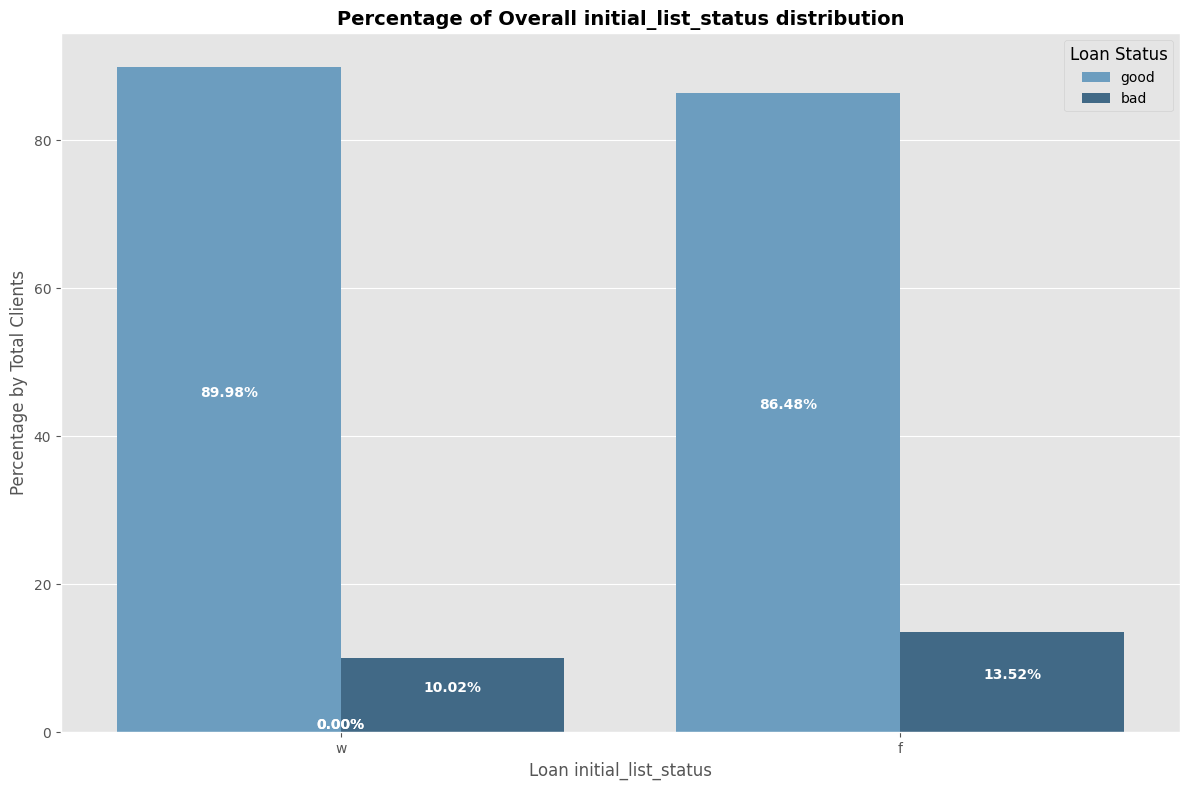

In [ ]:
plot_distribution_percentage_category('initial_list_status', 'v')

#### **Home Ownership**

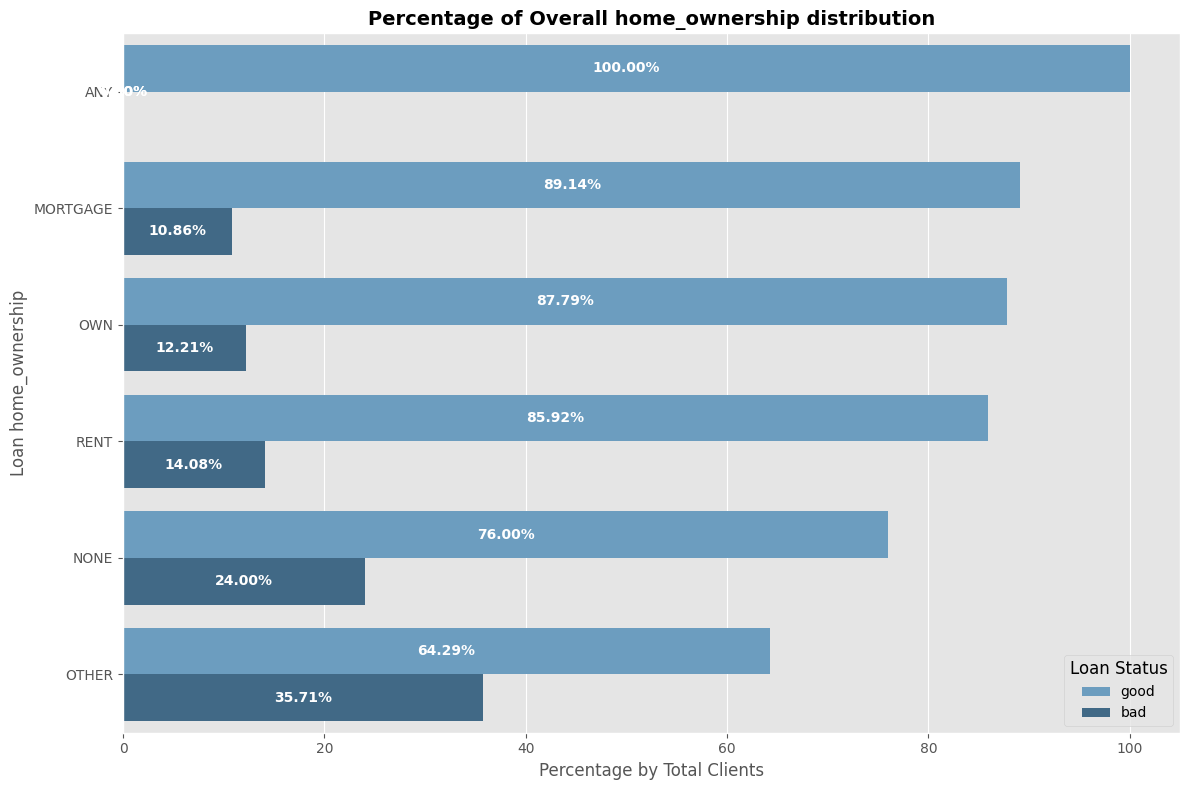

In [ ]:
plot_distribution_percentage_category('home_ownership', 'h')

#### **Annual Income**

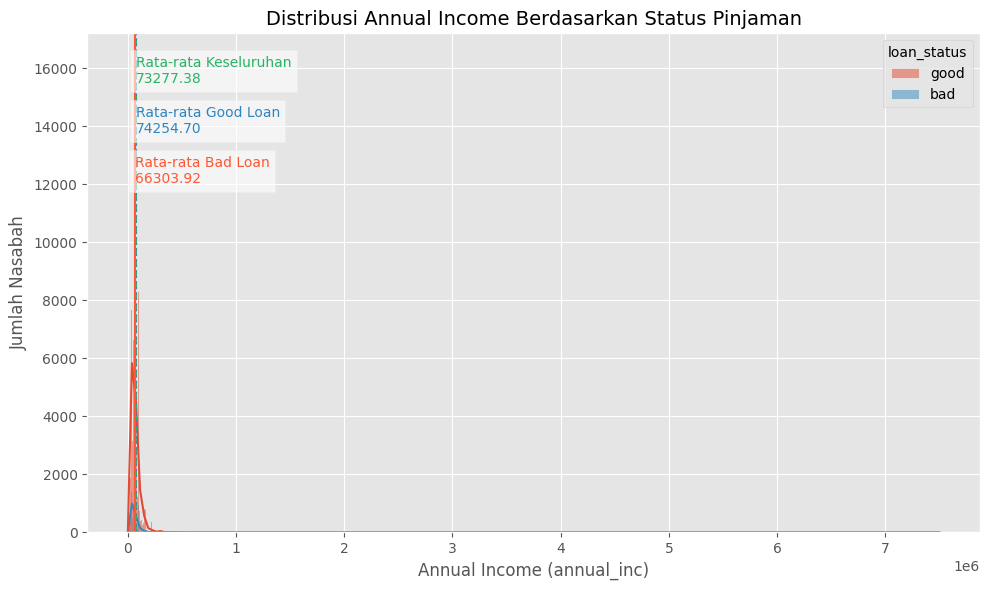

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='annual_inc', hue='loan_status', kde=True)

# Hitung rata-rata
mean_annual_inc = df['annual_inc'].mean()
mean_good_annual_inc = df[df['loan_status'] == 'good']['annual_inc'].mean()
mean_bad_annual_inc = df[df['loan_status'] == 'bad']['annual_inc'].mean()

# Tambahkan garis vertikal
plt.axvline(mean_annual_inc, color='#28B463', linestyle='dashed', label=f'Rata-rata Keseluruhan: {mean_annual_inc:.2f}')
plt.axvline(mean_good_annual_inc, color='#2E86C1', linestyle='dotted', label=f'Rata-rata Good Loan: {mean_good_annual_inc:.2f}')
plt.axvline(mean_bad_annual_inc, color='#FF5733', linestyle='solid', label=f'Rata-rata Bad Loan: {mean_bad_annual_inc:.2f}')

# Tambahkan teks pada grafik
plt.text(mean_annual_inc, plt.ylim()[1]*0.9, f'Rata-rata Keseluruhan\n{mean_annual_inc:.2f}', color='#28B463', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean_good_annual_inc, plt.ylim()[1]*0.8, f'Rata-rata Good Loan\n{mean_good_annual_inc:.2f}', color='#2E86C1', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean_bad_annual_inc, plt.ylim()[1]*0.7, f'Rata-rata Bad Loan\n{mean_bad_annual_inc:.2f}', color='#FF5733', ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.title('Distribusi Annual Income Berdasarkan Status Pinjaman', fontsize=14)
plt.xlabel('Annual Income (annual_inc)', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution Categories Annual Income')

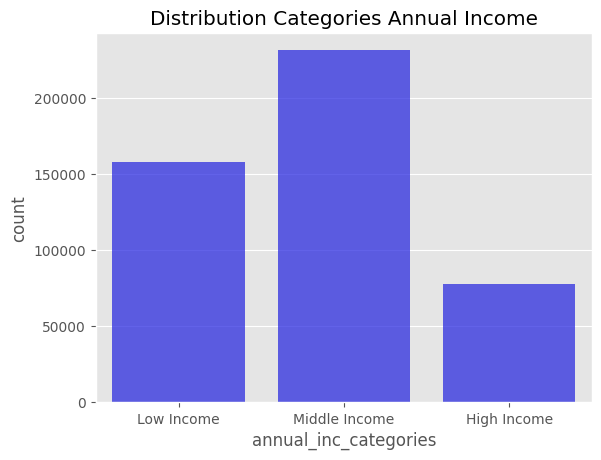

In [ ]:
df['annual_inc_categories'] = df['annual_inc'].apply(lambda x: 'Low Income' if x <= 50000 else ('Middle Income' if x <=100000 else 'High Income'))
sns.countplot(data=df, x='annual_inc_categories', color='blue', alpha=.7)
plt.title('Distribution Categories Annual Income')

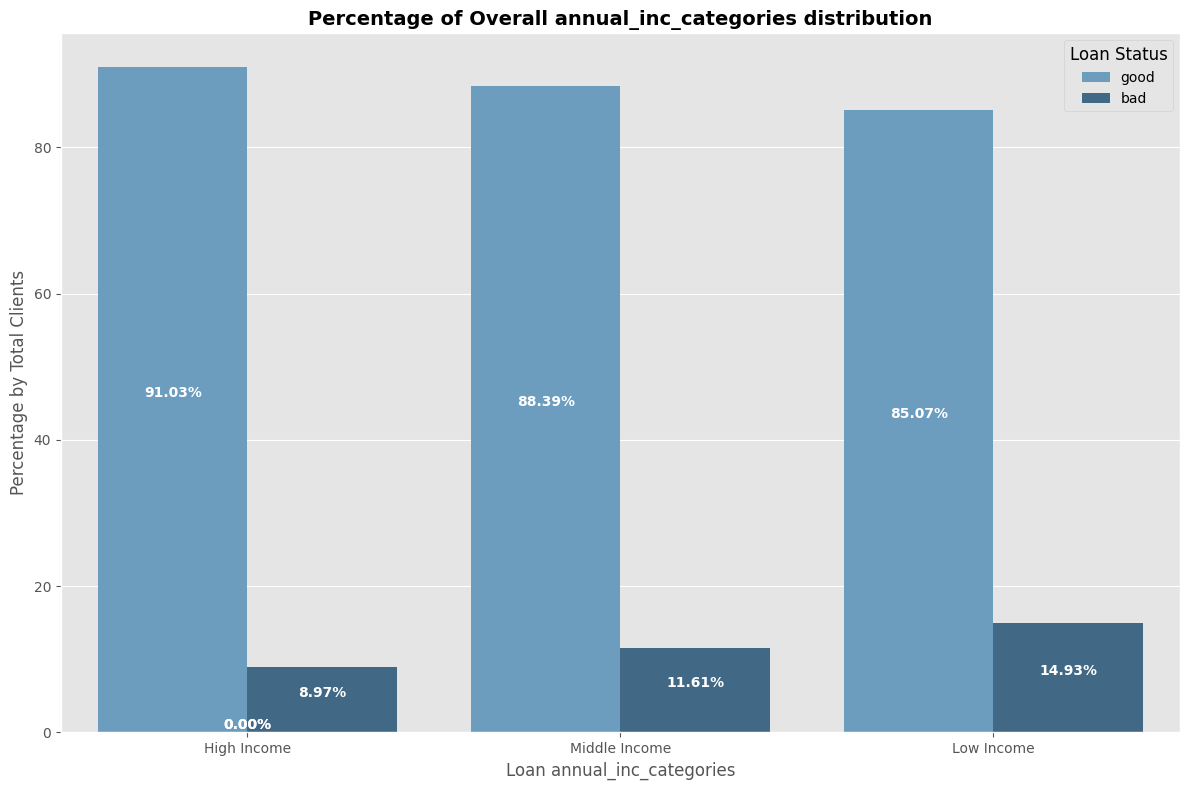

In [ ]:
plot_distribution_percentage_category('annual_inc_categories', 'v')

#### **Debt to Income Ratio**

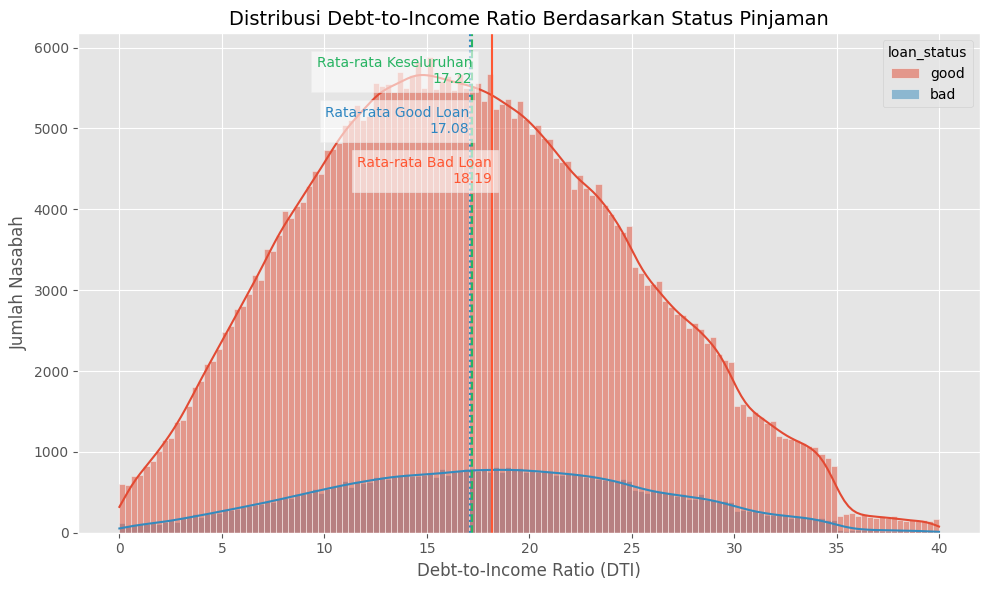

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='dti', hue='loan_status', kde=True)

# Hitung rata-rata
mean_dti = df['dti'].mean()
mean_good_dti = df[df['loan_status'] == 'good']['dti'].mean()
mean_bad_dti = df[df['loan_status'] == 'bad']['dti'].mean()

# Tambahkan garis vertikal
plt.axvline(mean_dti, color='#28B463', linestyle='dashed', label=f'Rata-rata Keseluruhan: {mean_dti:.2f}')
plt.axvline(mean_good_dti, color='#2E86C1', linestyle='dotted', label=f'Rata-rata Good Loan: {mean_good_dti:.2f}')
plt.axvline(mean_bad_dti, color='#FF5733', linestyle='solid', label=f'Rata-rata Bad Loan: {mean_bad_dti:.2f}')

# Tambahkan teks pada grafik
plt.text(mean_dti, plt.ylim()[1]*0.9, f'Rata-rata Keseluruhan\n{mean_dti:.2f}', color='#28B463', ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean_good_dti, plt.ylim()[1]*0.8, f'Rata-rata Good Loan\n{mean_good_dti:.2f}', color='#2E86C1', ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean_bad_dti, plt.ylim()[1]*0.7, f'Rata-rata Bad Loan\n{mean_bad_dti:.2f}', color='#FF5733', ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.title('Distribusi Debt-to-Income Ratio Berdasarkan Status Pinjaman', fontsize=14)
plt.xlabel('Debt-to-Income Ratio (DTI)', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution Categories Debt-to-Income Ratio')

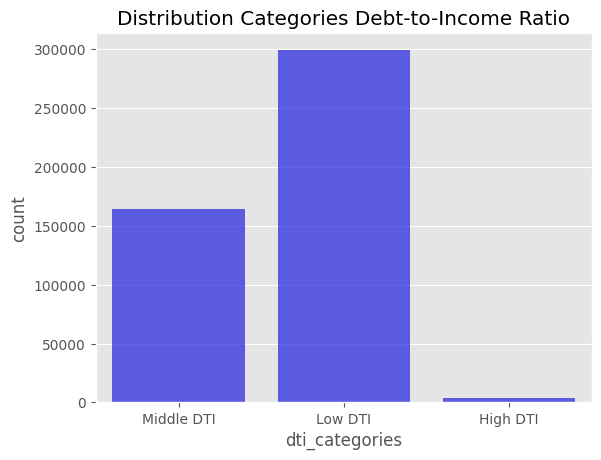

In [ ]:
df['dti_categories'] = df['dti'].apply(lambda x: 'Low DTI' if x <= 20 else ('Middle DTI' if x <=35 else 'High DTI'))
sns.countplot(data=df, x='dti_categories', color='blue', alpha=.7)
plt.title('Distribution Categories Debt-to-Income Ratio')

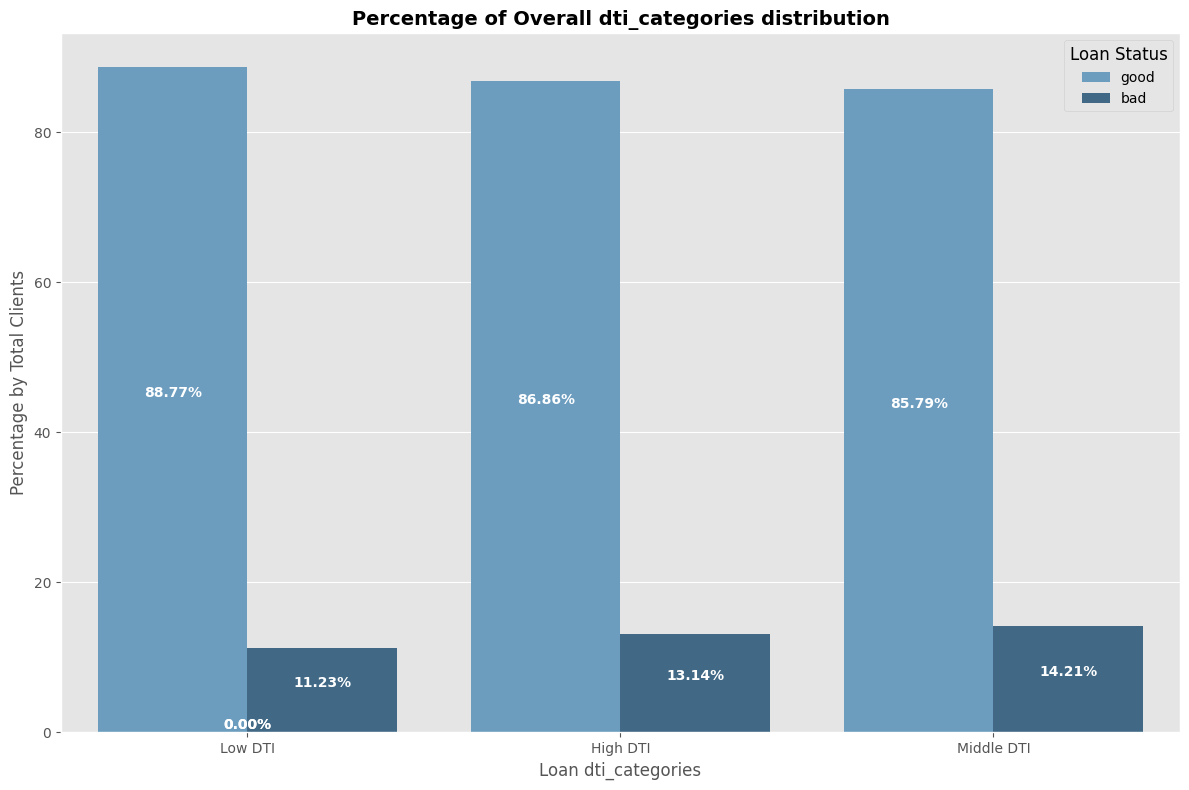

In [ ]:
plot_distribution_percentage_category('dti_categories', 'v')

## Data Preprocessing

In [ ]:
upper_tri = df[num].corr().where(np.triu(np.ones(df[num].corr().shape, dtype=bool), k=1))

col_to_drop = [col for col in upper_tri.columns if any(upper_tri[col] >.9)]
print(col_to_drop)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp']


In [ ]:
col_num_selected = num.drop(col_to_drop).to_list()
print(col_num_selected)

['id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [ ]:
col_cat_selected = ['term', 'purpose', 'grade', 'sub_grade', 'verification_status', 'emp_length', 'initial_list_status', 'home_ownership', 'loan_status', 'earliest_cr_line']
print(col_cat_selected)

['term', 'purpose', 'grade', 'sub_grade', 'verification_status', 'emp_length', 'initial_list_status', 'home_ownership', 'loan_status', 'earliest_cr_line']


In [ ]:
print(f'Jumlah kolom Numerik yang didrop: {len(col_to_drop)}')
print(f'Jumlah kolom Numerik: {len(col_num_selected)}')
print(f'Jumlah kolom Kategori: {len(col_cat_selected)}')

Jumlah kolom Numerik yang didrop: 6
Jumlah kolom Numerik: 24
Jumlah kolom Kategori: 10


In [ ]:
col_selected = col_cat_selected + col_num_selected

In [ ]:
df_prep = df[col_selected]

### Handle Missing Values

In [ ]:
df_prep.isnull().sum()

,0
term,0
purpose,0
grade,0
sub_grade,0
verification_status,0
emp_length,21008
initial_list_status,0
home_ownership,0
loan_status,0
earliest_cr_line,29


In [ ]:
def impute_missing_values(data):
  for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
      data[col].fillna(data[col].median(), inplace=True)
    else:
      data[col].fillna(data[col].mode()[0], inplace=True)

  return data

In [ ]:
df_prep = impute_missing_values(df_prep)
df_prep.isnull().sum()

,0
term,0
purpose,0
grade,0
sub_grade,0
verification_status,0
emp_length,0
initial_list_status,0
home_ownership,0
loan_status,0
earliest_cr_line,0


### Handle Duplicated Values

In [ ]:
(f'Jumlah Data Duplikat: {df_prep.duplicated().sum()}')

'Jumlah Data Duplikat: 0'

### Feature Engineering

In [ ]:
# Mengonversi kolom 'earliest_cr_line' menjadi format datetime
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format='%b-%y')
df_prep['earliest_cr_line_year'] = df_prep['earliest_cr_line'].dt.year.clip(upper=2014)

def credit_history_conversion(df):
    for index, rows in df.iterrows():
        credit_history = 2014 - rows['earliest_cr_line_year']
        if credit_history <= 2:
            df.at[index, 'credit_history'] = '0-2 years'
        elif credit_history <= 5:
            df.at[index, 'credit_history'] = '2-5 years'
        else:
            df.at[index, 'credit_history'] = '+5 years'

credit_history_conversion(df_prep)

df_prep = df_prep.drop(columns=['earliest_cr_line', 'earliest_cr_line_year'])

### Encoding Values

In [ ]:
df_prep.head()

,term,purpose,grade,sub_grade,verification_status,emp_length,initial_list_status,home_ownership,loan_status,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history
0,36 months,credit_card,B,B2,Verified,10+ years,f,RENT,good,1077501,5000,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,+5 years
1,60 months,car,C,C4,Source Verified,< 1 year,f,RENT,bad,1077430,2500,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,+5 years
2,36 months,small_business,C,C5,Not Verified,10+ years,f,RENT,good,1077175,2400,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,+5 years
3,36 months,other,C,C1,Source Verified,10+ years,f,RENT,good,1076863,10000,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,+5 years
4,60 months,other,B,B5,Source Verified,1 year,f,RENT,good,1075358,3000,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,+5 years


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
# Label Encoding
df_prep['term'] = LabelEncoder().fit_transform(df_prep['term'])
df_prep['sub_grade'] = LabelEncoder().fit_transform(df_prep['sub_grade'])
df_prep['credit_history'] = LabelEncoder().fit_transform(df_prep['credit_history'])
df_prep['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w':1})
df_prep['grade'] =df_prep['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
df_prep['loan_status'] = df_prep['loan_status'].map({'bad':0, 'good':1})

# One Hot Encoding
to_one_hot = ['purpose', 'verification_status', 'emp_length', 'home_ownership']

one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

one_hot_df = one_hot_encoder.fit_transform(df_prep[to_one_hot])
one_hot_df = pd.DataFrame(one_hot_df.toarray(), columns=one_hot_encoder.get_feature_names_out(to_one_hot))

df_prep = df_prep.drop(columns=to_one_hot).join(one_hot_df)

df_prep.head()

,term,grade,sub_grade,initial_list_status,loan_status,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,1,6,0,1,1077501,5000,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2,13,0,0,1077430,2500,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,14,0,1,1077175,2400,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2,10,0,1,1076863,10000,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,9,0,1,1075358,3000,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Transformation Values

In [ ]:
for col in col_num_selected:
  df_prep[col] = np.log1p(df_prep[col])

In [ ]:
df_prep.head()

,term,grade,sub_grade,initial_list_status,loan_status,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,1,6,0,1,13.890156,8.517393,2.455306,10.085851,3.355153,0.0,0.693147,1.386294,0.0,9.521422,4.439116,2.302585,0.00000,8.676258,6.759336,0.000000,0.000000,0.000000,5.151093,0.0,0.0,0.0,11.308849,10.03456,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2,13,0,0,13.890090,7.824446,2.789323,10.308986,0.693147,0.0,1.791759,1.386294,0.0,7.431300,2.341806,1.609438,0.00000,6.917418,6.078032,0.000000,4.771362,0.746688,4.792977,0.0,0.0,0.0,11.308849,10.03456,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,14,0,1,13.889853,7.783641,2.830858,9.413526,2.274186,0.0,1.098612,1.098612,0.0,7.991931,4.600158,2.397895,0.00000,8.007918,6.404650,0.000000,0.000000,0.000000,6.478371,0.0,0.0,0.0,11.308849,10.03456,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2,10,0,1,13.889564,9.210440,2.673459,10.803669,3.044522,0.0,0.693147,2.397895,0.0,8.630343,3.091042,3.637586,0.00000,9.411427,7.700897,2.888704,0.000000,0.000000,5.881873,0.0,0.0,0.0,11.308849,10.03456,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,9,0,1,13.888165,8.006701,2.616666,11.289794,2.941276,0.0,0.000000,2.772589,0.0,10.232216,4.005513,3.663562,6.64366,8.084307,6.917775,0.000000,0.000000,0.000000,4.231058,0.0,0.0,0.0,11.308849,10.03456,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_prep.drop('loan_status', axis=1)
y = df_prep['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (373028, 59)
Shape of X_test: (93257, 59)


### SMOTE

In [ ]:
print(f'Number of Good Loan Before SMOTE: {y_train.value_counts()[1]}')
print(f'Number of Bad Loan Before SMOTE: {y_train.value_counts()[0]}')

Number of Good Loan Before SMOTE: 327165
Number of Bad Loan Before SMOTE: 45863


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

print(f'Number of Good Loan After SMOTE: {y_train_smt.value_counts()[1]}')
print(f'Number of Bad Loan After SMOTE: {y_train_smt.value_counts()[0]}')

Number of Good Loan After SMOTE: 327165
Number of Bad Loan After SMOTE: 327165


### Train Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the Deep Learning model with L2 regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smt.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with callbacks
history = model.fit(X_train_smt, y_train_smt, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Print a summary of the model
model.summary()

Epoch 1/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.8702 - loss: 0.3677 - val_accuracy: 0.7717 - val_loss: 0.5479 - learning_rate: 0.0010
Epoch 2/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9036 - loss: 0.2621 - val_accuracy: 0.7899 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 3/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.9050 - loss: 0.2558 - val_accuracy: 0.7591 - val_loss: 0.5160 - learning_rate: 0.0010
Epoch 4/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9059 - loss: 0.2524 - val_accuracy: 0.7830 - val_loss: 0.3739 - learning_rate: 0.0010
Epoch 5/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.9065 - loss: 0.2508 - val_accuracy: 0.7722 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 6/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9070 - loss: 0.2496 - val_accuracy: 0.7754 - val_loss: 0.4043 - learning_rate: 0.0010
Epoch 7/50
16359/16359 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step -

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,149 (211.52 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,100 (141.02 KB)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.2104
Test Accuracy: 0.9577


2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

--- Classification Report ---
Recall: 0.9790
Precision: 0.9730
F1-Score: 0.9760
ROC AUC: 0.9575


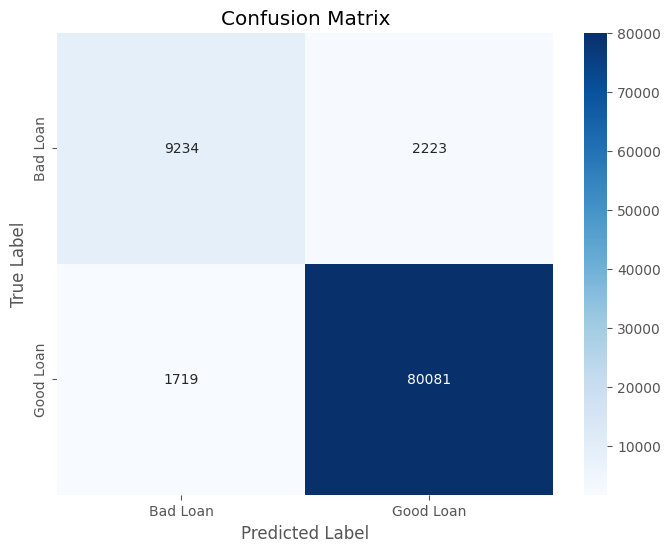

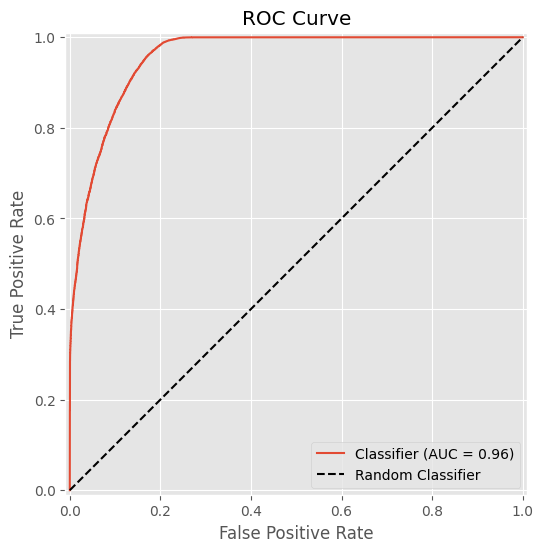

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"\n--- Classification Report ---")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad Loan', 'Good Loan'], yticklabels=['Bad Loan', 'Good Loan'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_prob, ax=plt.gca())
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Feature Importance

2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2915/2915 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2915/2915 ━

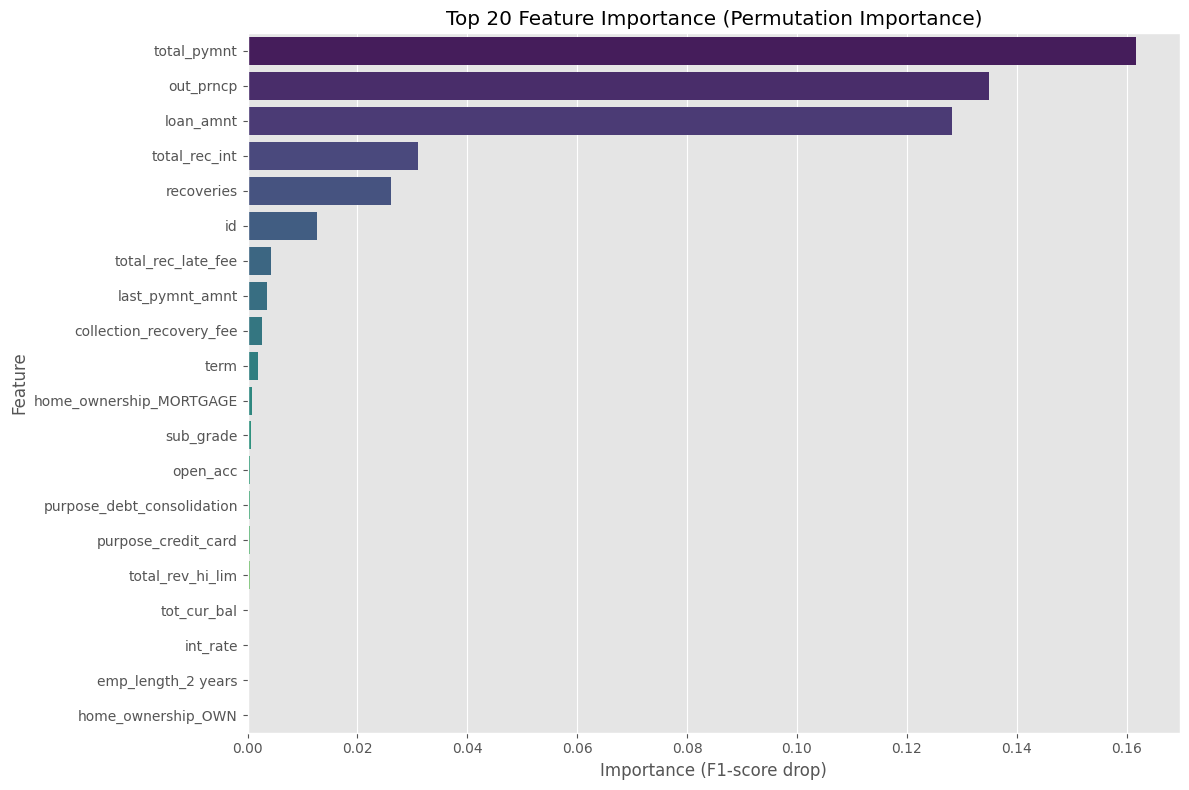

In [ ]:
from sklearn.metrics import f1_score
import pandas as pd

# Get baseline F1-score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
baseline_f1 = f1_score(y_test, y_pred)

feature_importances = {}
for feature in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[feature] = X_test_shuffled[feature].sample(frac=1, random_state=42).values

    y_pred_prob_shuffled = model.predict(X_test_shuffled)
    y_pred_shuffled = (y_pred_prob_shuffled > 0.5).astype(int)
    shuffled_f1 = f1_score(y_test, y_pred_shuffled)

    importance = baseline_f1 - shuffled_f1
    feature_importances[feature] = importance

# Convert to DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
}).sort_values(by='Importance', ascending=False)

print("--- Feature Importance (based on F1-score drop) ---")
print(importance_df.head(10))

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importance (Permutation Importance)')
plt.xlabel('Importance (F1-score drop)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# simpan model ke file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan!")


Model berhasil disimpan!
